#Сеттеры и геттеры

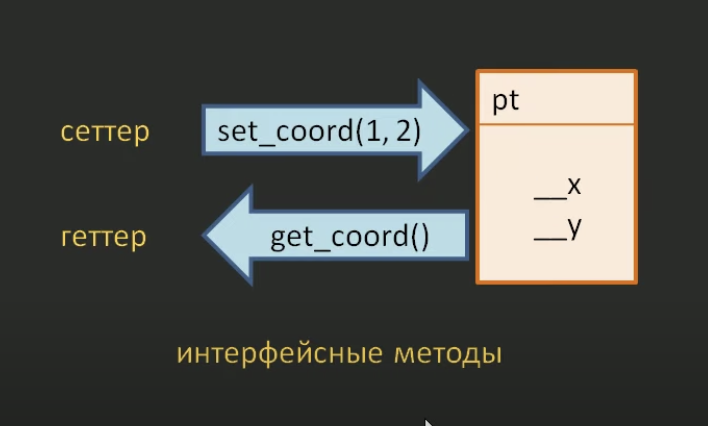

In [ ]:
class Point:
    __x = 0
    __y = 0

    def __init__(self, x=0, y=0):
        self.x = x
        self.__y = y

    def set_coord(self, x, y):
        self.__x = x
        self.__y = y

    def get_Coord(self):
        return self.__x, self.__y

In [ ]:
point = Point(5,10)
point.x

5

In [ ]:
point.get_Coord()

(0, 10)

In [ ]:
point.__x

AttributeError: ignored

#Абстрактные методы и классы

создаем два класса -- прямоугольник и квадрат
у обоих есть функция подсчета периметра, но реализованная по-разному в силу разных геом свойств фигур

In [ ]:
class Rectangle:
    def __init__(self, w, h):
        self.w = w
        self.h = h

    def get_rect_pr(self):
        return 2*(self.w+self.h)


class Square:
    def __init__(self, a):
        self.a = a

    def get_sq_pr(self):
        return 4*self.a

проверим работоспособность:

In [ ]:
r1 = Rectangle(1, 2)
r2 = Rectangle(3, 4)
print(r1.get_rect_pr(), r2.get_rect_pr())

s1 = Square(10)
s2 = Square(20)
print(s1.get_sq_pr(), s2.get_sq_pr())

6 14
40 80


но теперь поместим их в массив

In [ ]:
geom = [r1, r2, s1, s2]

которую можно легко перебрать с помощью цикла for и где бы мы хотели получить значение периметра для каждой фигуры:



In [ ]:
for g in geom:
    print(g.get_rect_pr())

6
14


AttributeError: ignored

Как вы понимаете, когда в цикле очередь дойдет до объекта s1, возникнет ошибка, т.к. в классе Square отсутствует метод get_rect_pr(). Конечно, зная, что в коллекции находятся объекты Rectangle и Square, можно было бы в цикле записать проверку:



In [ ]:
for g in geom:
    if isinstance(g, Rectangle):
        print(g.get_rect_pr())
    else:
        print(g.get_sq_pr())

6
14
40
80


и все заработает. Но у такого кода мало гибкости и, например, при добавлении еще одного класса:



In [ ]:
class Triangle:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def get_tr_pr(self):
        return self.a + self.b + self.c


Получим снова ошибку:



In [ ]:
t1 = Triangle(1,2,3)
t2 = Triangle(4,5,6)
geom = [r1, r2, s1, s2, t1, t2]



Конечно, в цикле for можно дополнительно проверить на соответствие классам Square и Triangle, но красоты и гибкости нашей программе это не придаст.

Выход: **полиморфизм!!**

Все назовем get_pr

In [ ]:
for g in geom:
    print( g. get_pr() )

Но у нашей реализации есть один существенный недостаток. Что если мы забудем в каком-либо классе определить метод get_pr(), например, в Triangle. Тогда, очевидно, программа приведет к ошибке. Как можно было бы этого избежать? Один из вариантов определить базовый класс для классов геометрических примитивов и в нем прописать реализацию геттера get_pr(), используемую по умолчанию, например, так:

In [ ]:
class Geom:
    def get_pr(self):
        return -1

А все остальные классы унаследовать от него:



In [ ]:
class Rectangle(Geom):
    def __init__(self, w, h):
        self.w = w
        self.h = h

    def get_pr(self):
        return 2*(self.w+self.h)


class Square(Geom):
    def __init__(self, a):
        self.a = a

    def get_pr(self):
        return 4*self.a

class Triangle(Geom):
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

In [ ]:
tr = Triangle(3,4,5)
tr.get_pr()

-1

In [ ]:
s = Square(5)
s.get_pr()

20

Теперь, после запуска программы, для треугольников будем получать значения -1.

Но и это не самое лучшее решение. Все же, нам бы хотелось, чтобы каждый дочерний класс имел бы обязательную реализацию метода get_pr(). Для этого в геттере get_pr() мы будем генерировать специальное исключение NotImplementedError, следующим образом:

In [ ]:
class Geom:
    def get_pr(self):
        raise NotImplementedError("В дочернем классе должен быть переопределен метод get_pr()")

И если в каком-либо дочернем классе не будет определен метод get_pr(), то вызовется метод базового класса и выдаст ошибку NotImplementedError, которая будет сигнализировать о том, что метод не переопределен.

Запустим программу и действительно видим это сообщение при попытке вызвать get_pr() для объектов Triangle. Причем, видя ошибку NotImplementedError, мы понимаем, что она связана именно с необходимостью  переопределения get_pr(), а не с чем-то другим. В этом плюс такого подхода.


Вывод:
**Абстрактные классы** - это классы, которые предназначены для наследования, но избегают реализации конкретных методов, оставляя только сигнатуры методов, которые должны реализовывать подклассы.

**Что это значит программно?**


Абстрактным называется класс, который содержит один и более абстрактных методов.

Абстрактным называется объявленный, но не реализованный метод.

In [ ]:
class MontyPython:
    def joke(self):
        raise NotImplementedError()

    def punchline(self):
        raise NotImplementedError()

class ArgumentClinic(MontyPython):
    def joke(self):
        return "Hahahahahah"

Когда мы создаем объект и называем это два метода, мы получим ошибку (как и ожидалось) с punchline() метод.

In [ ]:
sketch = ArgumentClinic()
sketch.punchline()

NotImplementedError: ignored

Однако это все еще позволяет нам создавать экземпляр объекта класса ArgumentClinic без получения ошибки. На самом деле мы не получим ошибку, пока не найдем punchline().

Этого можно избежать, используя модуль Abstract Base Class (ABC). Давайте посмотрим, как это работает на том же примере:

In [ ]:
from abc import ABCMeta, abstractmethod
class MontyPython(metaclass=ABCMeta):
  @abstractmethod
  def joke(self):
    pass
  @abstractmethod
  def punchline(self):
  	pass

class ArgumentClinic(MontyPython):
  def joke(self):
    return "Hahahahahah"

На этот раз, когда мы пытаемся создать экземпляр объекта из неполного класса, мы немедленно получаем TypeError!

In [ ]:
c = ArgumentClinic()

TypeError: ignored

В этом случае легко завершить класс, чтобы избежать любых ошибок типа:



In [ ]:
class ArgumentClinic(MontyPython):
  def joke(self):
    return "Hahahahahah"

  def punchline(self):
    return "Send in the constable!"

c = ArgumentClinic()
c



#Модули и пакеты


в другом ноутбуке

**Модуль** -- это файлы с расширением .py. Если мы импортируем модуль с помощью import, то получаем доступ к глобальным переменным модуля и его функциями.


**Пакет** -- это специальная структура для организации и управления набором модулей. Пакеты позволяют группировать связанные модули в иерархическую структуру, что делает управление кодом в больших проектах более удобным и структурированным.



*Основные особенности пакетов:*

**Иерархия:** Пакеты могут содержать другие пакеты и/или модули, образуя иерархическую структуру. Это позволяет организовать код в логические блоки и подблоки.

**Создание пакета:** Для создания пакета вам нужно создать директорию (папку) с файлом __init__.py внутри нее. Этот файл является обязательным для Python 3.3 и более поздних версий, и он может быть пустым или содержать инициализирующий код.

**Импорт пакета:** Для импорта модулей из пакета вы можете использовать точечную нотацию. Например, если у вас есть пакет с именем mypackage и модуль внутри него с именем mymodule, вы можете импортировать его следующим образом:

In [ ]:
from mypackage import mymodule

**Относительный импорт:** Внутри пакетов можно использовать относительный импорт для обращения к другим модулям в том же пакете. Это делает код более переносимым, так как он не зависит от абсолютных путей к модулям.

